## Basic concepts

This course is meant to be an introduction to quantum variational algorithms. Before we dive into the specifics of these algorithms, there are some quantum computation concepts that are essential to understand how and why they work. Most of them are covered in John Watrous' course *Understanding Quantum Information and Computation*, which is available as [a series of YouTube videos](https://www.youtube.com/playlist?list=PLOFEBzvs-VvqKKMXX4vbi4EB1uaErFMSO) and as [textbook chapters](https://qiskit.org/learn/course/basics-quantum-information/). We strongly recommend that you go through the contents of that course first, as we will assume some familiarity with the theoretical context it provides. However, in this chapter we offer a quick reminder of some of the most important concepts. After that, we introduce Qiskit's *primitives*, the building blocks of variational and many other quantum algorithms.

## General quantum systems

All physical systems, whether classical or quantum, can exist in different states. For example, a car on a road can have a certain mass, position, speed, or acceleration that characterize its state. Similarly, quantum systems can also have different configurations or states, but they differ from classical systems in how we deal with measurements and state evolution. This leads to unique properties such as *superposition* and *entanglement* that are exclusive to quantum mechanics.


### Quantum states and measurements

Just like we can describe a car's state using physical properties like speed or acceleration, we can also describe the state of a quantum system using *observables*, which are mathematical objects.
In quantum mechanics, states are represented by normalized complex column vectors, or *kets* $|\psi\rangle$, and observables are hermitian linear operators ($\hat{H}=\hat{H}^{\dagger}$) that act on the kets. Measuring an observable for one of its _eigenstates_ $|\lambda\rangle$ (i.e. eigenvectors) will give us the corresponding eigenvalue $\lambda$ as readout.

One key difference between quantum and classical mechanics is that quantum states do not need to be eigenstates, instead they can be expressed as a linear combination, or *superposition*, of the orthonormal basis of eigenstates of any given observable. Measuring a superposition state gives us a random sample of the eigenvalues, with the probability of each outcome determined by the coefficients of the corresponding eigenstates.

In particular, the probability of obtaining a specific eigenvalue $\lambda$ when the state is $|\psi\rangle$ would be the module square of the coefficient of the corresponding eigenstate $|\lambda\rangle$ on $|\psi\rangle$. These coefficients can be obtained by computing the scalar product of $|\psi\rangle$ and the eigenstate $|\lambda\rangle$, $\langle \lambda| \psi \rangle$, where $\langle \lambda|=|\lambda\rangle^\dagger$ is a row vector or *bra*, so the probability of obtaining $\lambda$ is $p_{\lambda} = |\langle \lambda| \psi \rangle|^2$. This probability can be equivalently interpreted as the probability that the state is $|\lambda\rangle$; although this uncertainty is fundamental, and does not come from a lack of knowledge —as proven by J. S. Bell, and Nobel Laureates A. Aspect, J. Clauser, and A. Zeilinger.

However, not all hermitian operators share the same eigenvectors, which means that the observables they represent cannot be measured simultaneously. This gives rise to the uncertainty principle, which is a fundamental feature of quantum mechanics.

In summary, quantum states can be described by observables, and measuring observables gives us information about the state. Superposition states are a key feature of quantum mechanics, and the uncertainty principle arises from the fact that not all observables can be measured simultaneously.

### State evolution

When we want to change a quantum state from $|\psi\rangle$ to another state $|\phi\rangle$, we use a unitary operator $U$ that represents that change. This change is described with the follow expression, $U|\psi\rangle = |\phi\rangle$, where $U^\dagger = U^{-1}$.

This has important implications for quantum mechanics, including the fact that information is always preserved and orthogonal states remain orthogonal. For Quantum Computing, ideal quantum gates represent unitary operations on the underlying state. However, noise can make these operations non-unitary, which means that we lose information. For simplicity, we won't discuss these cases in this course.

One exception to the rule of gates being unitary is *measurement gates*, which take a random sample of a particular observable and destroy information about the complete probability distribution. The system is then left in the eigenstate associated with the measured value.

### Multiple subsystems

If we're working with a quantum system made up of several subsystems, the joint state is represented by a superposition of the tensor product of basis kets from each subsystem. For the case of two subsystems this is: $$|\psi\rangle = \sum_{a}\sum_{b} w_{ab} |a\rangle \otimes |b\rangle.$$ However, not all joint states can be written directly as a tensor product of states from the individual subsystems: $$|\psi\rangle \neq |\psi_{a}\rangle \otimes |\psi_{b}\rangle.$$ When this is not the case, we say that we are dealing with *entangled states*, where the states of the subsystems are not independent.

Entanglement is a unique feature of quantum mechanics that can be used to achieve things that classical systems cannot. Quantum operators can act independently on individual subsystems or act on several subsystems or the entire system as a whole using a tensor product of operators.


## Quantum computing

Quantum computing is based on the concept of "qubits," which are quantum systems that can only be in two different states, labeled $|0\rangle$ and $|1\rangle$. These represent the minimum unit of quantum information, analogous to the classical bits `0` and `1`. For an $n$-qubit system, there are $2^n$ possible independent states, each labeled by an $n$-bit string, just like a classical system composed of multiple bits. The set of these $n$-bit strings is called the *computational basis*, and circuit readouts (i.e., measurement outputs) are generally expressed in terms of this basis. For example, if we have a 2-qubit system, the computational basis is ${|00\rangle, |01\rangle, |10\rangle, |11\rangle }$, and measurement outputs may be expressed as binary strings like {${\texttt{00}, \texttt{01}, \texttt{10}, \texttt{11}}$}.

## Primitives

If you're wondering how to measure a quantum system and what you can measure, Qiskit offers two primitives that can help:

* `Sampler`: Given a quantum state $|\psi\rangle$, this primitive obtains the probability of each possible computational basis state.
* `Estimator`: Given a quantum observable $\hat{H}$ and a state $|\psi\rangle$, this primitive computes the expected value of $\hat{H}$.


### The Sampler primitive

The `Sampler` primitive calculates the probability of obtaining each possible state $|k\rangle$ from the computational basis, given a quantum circuit that prepares the state $|\psi\rangle$. It calculates $$p_k = |\langle k | \psi \rangle|^2 \quad \forall k \in \mathbb{Z}_2^n \equiv \{0,1,\cdots,2^n-1\},$$ where $n$ is the number of qubits, and $k$ the integer representation of any possible output binary string $\{0,1\}^n$ (i.e. integers base $2$).


[Qiskit Runtime's](https://qiskit.org/documentation/partners/qiskit_ibm_runtime/stubs/qiskit_ibm_runtime.Sampler.html) `Sampler` runs the circuit multiple times on a quantum device, performing measurements on each run, and reconstructing the probability distribution from the recovered bitstrings. The more runs (or *shots*) it performs, the more accurate the results will be, but this requires more time and quantum resources.


However, since the number of possible outputs grows exponentially with the number of qubits $n$ (i.e. $2^n$), the number of shots will need to grow exponentially as well in order to capture a _dense_ probability distribution. Therefore, `Sampler` is only efficient for *sparse* probability distributions; where the target state $|\psi\rangle$ must be expressible as a linear combination of the computational basis states, with the number of terms growing at most polynomially with the number of qubits: $$|\psi\rangle = \sum^{\text{Poly}(n)}_k w_k |k\rangle.$$


The `Sampler` can also be configured to retrieve probabilities from a subsection of the circuit, representing a subset of the total possible states.

### The Estimator primitive


The `Estimator` primitive calculates the expectation value of an observable $\hat{H}$ for a quantum state $|\psi\rangle$; where the observable probabilities can be expressed as $p_\lambda = |\langle\lambda|\psi\rangle|^2$, being $|\lambda\rangle$ the eigenstates of the observable $\hat{H}$. The expectation value is then defined as the average of all possible outcomes $\lambda$ (i.e. the eigenvalues of the observable) of a measurement of the state $|\psi\rangle$, weighted by the corresponding probabilities: $$\langle\hat{H}\rangle_\psi := \sum_\lambda p_\lambda \lambda = \langle \psi | \hat{H} | \psi \rangle$$


However, calculating the expectation value of an observable is not always possible, as we often don't know its eigenbasis. [Qiskit Runtime's](https://qiskit.org/documentation/partners/qiskit_ibm_runtime/stubs/qiskit_ibm_runtime.Estimator.html) `Estimator` uses a complex algebraic process to estimate the expectation value on a real quantum device by breaking down the observable into a combination of other observables whose eigenbasis we do know.

In simpler terms, `Estimator` breaks down any observable that it doesn't know how to measure into simpler, measurable observables called Pauli operators

Any operator can be expressed as a combination of $4^n$ Pauli operators. 

$$
\hat{P}_k := 
\sigma_{k_{n-1}}\otimes \cdots \otimes \sigma_{k_0} \quad 
\forall k \in \mathbb{Z}_4^n \equiv \{0,1,\cdots,4^n-1\}, \\
$$ 

such that $$\hat{H} = \sum^{4^n-1}_{k=0} w_k \hat{P}_k,$$

where $n$ is the number of qubits, $k \equiv k_{n-1} \cdots k_0$ for $k_l \in \mathbb{Z}_4 \equiv \{0, 1, 2, 3\}$ (i.e. integers base $4$), and $(\sigma_0, \sigma_1, \sigma_2, \sigma_3) := (I, X, Y, Z)$.

After performing this decomposition, `Estimator` derives a new circuit $V_k|\psi\rangle$ for each observable $\hat{P}_k$ (i.e. from the original circuit), to effectively _diagonalize_ the Pauli observable in the computational basis and measure it. We can easily measure Pauli observables because we know $V_k$ ahead of time, which is not the case generally for other observables.

For each $\hat{P}_k$, the Estimator runs the corresponding circuit on a quantum device multiple times, measures the output state in the computational basis, and calculates the probability $p_{kj}$ of obtaining each possible output $j$. It then looks for the eigenvalue $\lambda_{kj}$ of $P_k$ corresponding to each output $j$, multiplies by $w_k$, and adds all the results together to obtain the expected value of the observable $\hat{H}$ for the given state $|\psi\rangle$.

$$
\langle\hat{H}\rangle_\psi = 
\sum_{k=0}^{4^n-1} w_k \sum_{j=0}^{2^n-1}p_{kj} \lambda_{kj},
$$

Since calculating the expectation value of $4^n$ Paulis is impractical (i.e. exponentially growing), `Estimator` can only be efficient when a large amount of $w_k$ are zero (i.e. _sparse_ Pauli decomposition instead of _dense_). Formally we say that, for this computation to be _efficiently solvable_, the number of non-zero terms has to grow at most polynomially with the number of qubits $n$: $$\hat{H} = \sum^{\text{Poly}(n)}_k w_k \hat{P}_k.$$

The reader may notice the implicit assumption that probability sampling also needs to be efficient as explained for `Sampler`; which means

$$
\langle\hat{H}\rangle_\psi = 
\sum_{k}^{\text{Poly}(n)} w_k \sum_{j}^{\text{Poly}(n)}p_{kj} \lambda_{kj}.
$$

#### Guided example to calculate expectation values

Let's assume the single-qubit state $|+\rangle := H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$, and observable 

$$
\hat{H} =  
\begin{pmatrix} 
-1 & 2 \\
2 & -1 \\
\end{pmatrix} =
2X - Z,
$$

with the following theoretical expectation value $\langle\hat{H}\rangle_+ = \langle+|\hat{H}|+\rangle = 2.$

Since we do not know how to measure this observable, we cannot compute its expectation value directly, and we need to re-express it as $\langle\hat{H}\rangle_+ = 2\langle X \rangle_+ - \langle Z \rangle_+ $. Which can be shown to evaluate to the same result by virtue of noting that $\langle+|X|+\rangle = 1$, and $\langle+|Z|+\rangle = 0$.

Let see how to compute $\langle X \rangle_+$ and $\langle Z \rangle_+$ directly. Since $X$ and $Z$ do not commute (i.e. don't share the same eigenbasis), they cannot be measured simultaneously, therefore we need the auxiliary circuits:

Original circuit:


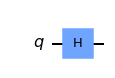

Auxiliary circuit for X


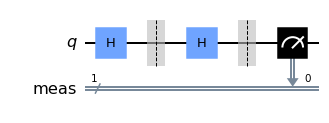

Auxiliary circuit for Z


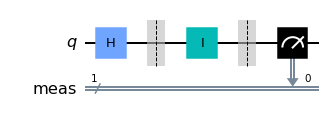

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp

# The following code will work for any other initial single-qubit state and observable
original_circuit = QuantumCircuit(1)
original_circuit.h(0)

H = SparsePauliOp(["X", "Z"], [2, -1])

aux_circuits = []
for pauli in H.paulis:
    aux_circ = original_circuit.copy()
    aux_circ.barrier()
    if str(pauli) == "X":
        aux_circ.h(0)
    elif str(pauli) == "Y":
        aux_circ.sdg(0)
        aux_circ.h(0)
    else:
        aux_circ.i(0)
    aux_circ.measure_all()
    aux_circuits.append(aux_circ)


print("Original circuit:")
display(original_circuit.draw("mpl"))
for (circuit, pauli) in zip(aux_circuits, H.paulis):
    print(f"Auxiliary circuit for {str(pauli)}")
    display(circuit.draw("mpl"))

We can now carry out the computation manually using `Sampler` and check the results on `Estimator`:

In [2]:
from qiskit.primitives import Sampler, Estimator
from qiskit.circuit.library import IGate, ZGate
import numpy as np


## SAMPLER
sampler = Sampler()
job = sampler.run(aux_circuits)
probability_dists = job.result().quasi_dists

expvals = []
for dist, pauli in zip(probability_dists, H.paulis):
    val = 0
    if str(pauli) == "I":
        Lambda = IGate().to_matrix().real
    else:
        Lambda = ZGate().to_matrix().real
    val += Lambda[0][0]*dist.get(0, 0)
    val += Lambda[1][1]*dist.get(1, 0)
    expvals.append(val)


print("Sampler results:")
for (pauli, expval) in zip(H.paulis, expvals):
    print(f"  >> Expected value of {str(pauli)}: {expval:.5f}")

total_expval = np.sum(H.coeffs*expvals).real
print(f"  >> Total expected value: {total_expval:.5f}")


## ESTIMATOR
observables = [*H.paulis, H]  # Note: run for individual Paulis as well as full observable H

estimator = Estimator()
job = estimator.run([original_circuit]*len(observables), observables)
estimator_expvals = job.result().values

print("Estimator results:")
for (obs, expval) in zip(observables, estimator_expvals):
    if obs is not H:
        print(f"  >> Expected value of {str(obs)}: {expval:.5f}")
    else:
        print(f"  >> Total expected value: {expval:.5f}")


Sampler results:
  >> Expected value of X: 1.00000
  >> Expected value of Z: 0.00000
  >> Total expected value: 2.00000
Estimator results:
  >> Expected value of X: 1.00000
  >> Expected value of Z: 0.00000
  >> Total expected value: 2.00000


#### Mathematical rigor (optional)

Expressing $|\psi\rangle$ with respect to the basis of eigenstates of $\hat{H}$, $|\psi\rangle = \sum_\lambda a_\lambda |\lambda\rangle$, it follows:

$$
\langle \psi | \hat{H} | \psi \rangle = 
\bigg(\sum_{\lambda'}a^*_{\lambda'} \langle \lambda'|\bigg) \hat{H} 
\bigg(\sum_{\lambda} a_\lambda | \lambda\rangle\bigg) =  
\sum_{\lambda}\sum_{\lambda'} a^*_{\lambda'}a_{\lambda} 
\langle \lambda'|\hat{H}| \lambda\rangle = \\ 
\sum_{\lambda}\sum_{\lambda'} a^*_{\lambda'}a_{\lambda} \lambda 
\langle \lambda'| \lambda\rangle = 
\sum_{\lambda}\sum_{\lambda'} a^*_{\lambda'}a_{\lambda} \lambda 
\cdot \delta_{\lambda, \lambda'} = 
\sum_\lambda |a_\lambda|^2 \lambda = 
\sum_\lambda p_\lambda \lambda
$$

Since we do not know the eigenvalues or eigenstates of the target observable $\hat{H}$, first we need to consider its diagonalization. Given that $\hat{H}$ is hermitian, there exists a unitary transformation $V$ such that $$\hat{H}=V^\dagger \Lambda V,$$ where $\Lambda$ is the diagonal eigenvalue matrix, so $\langle j | \Lambda | k \rangle = 0$ if $j\neq k$, and $\langle j | \Lambda | j \rangle = \lambda_j$.

This implies that the expected value can be rewritten as:

$$
\langle\psi|\hat{H}|\psi\rangle = 
\langle\psi|V^\dagger \Lambda V|\psi\rangle = 
\langle\psi|V^\dagger \bigg(\sum_{j=0}^{2^n-1} |j\rangle 
\langle j|\bigg) \Lambda \bigg(\sum_{k=0}^{2^n-1} |k\rangle \langle k|\bigg) V|\psi\rangle = \\ 
\sum_{j=0}^{2^n-1} \sum_{k=0}^{2^n-1}\langle\psi|V^\dagger |j\rangle 
\langle j| \Lambda  |k\rangle \langle k| V|\psi\rangle = 
\sum_{j=0}^{2^n-1}\langle\psi|V^\dagger |j\rangle 
\langle j| \Lambda  |j\rangle \langle j| V|\psi\rangle = 
\sum_{j=0}^{2^n-1}|\langle j| V|\psi\rangle|^2 \lambda_j.
$$

Given that if a system is in the state $|\phi\rangle = V |\psi\rangle$ the probability of measuring $| j\rangle$ is $p_j = |\langle j|\phi \rangle|^2$, the above expected value can be expressed as:

$$
\langle\psi|\hat{H}|\psi\rangle = 
\sum_{j=0}^{2^n-1} p_j \lambda_j.
$$

It is very important to note that the probabilities are taken from the state $V |\psi\rangle$ instead of $|\psi\rangle$. This is why the matrix $V$ is absolutely necessary.

You might be wondering how to obtain the matrix $V$ and the eigenvalues $\Lambda$. If you already had the eigenvalues, then there would be no need to use a quantum computer since the goal of variational algorithms is to find these eigenvalues of $\hat{H}$.

Fortunately, there is a way around that: any $2^n \times 2^n$ matrix can be written as a linear combination of $4^n$ tensor products of $n$ Pauli matrices and identities, all of which are both hermitian and unitary with known $V$ and $\Lambda$. This is what Runtime's `Estimator` does internally by decomposing any [Operator](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Operator.html) object into a [SparsePauliOp](https://qiskit.org/documentation/stubs/qiskit.quantum_info.SparsePauliOp.html).

Here are the Operators that can be used:

* for $I \equiv \sigma_0 = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}:\quad$ $V_0=I= \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}\quad$ and $\quad \Lambda_0 = I = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$
* for $X\equiv\sigma_1 = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}:\quad$ $V_1=H=\frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$ and $\Lambda_1 = \sigma_3 = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$
* for $Y \equiv \sigma_2 = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}:\quad$ $V_2=HS^\dagger  =\frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}\cdot  \begin{pmatrix} 1 & 0 \\ 0 & -i \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & -i \\ 1 & i \end{pmatrix}\quad $ and $\quad \Lambda_2 = \sigma_3 = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$
* for $Z \equiv \sigma_3 = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}:\quad$ $V_3=I\quad$ and $\quad \Lambda_3 = \sigma_3 = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$



So let's rewrite $\hat{H}$ with respect to the Paulis and identities: 

$$
\hat{H} = 
\sum_{k_{n-1}=0}^3...
\sum_{k_0=0}^3 w_{k_{n-1}...k_0} 
\sigma_{k_{n-1}}\otimes ... \otimes \sigma_{k_0} = \sum_{k=0}^{4^n-1} w_k \hat{P}_k,
$$

where $k = \sum_{l=0}^{n-1} 4^l k_l \equiv k_{n-1}...k_0$ for $k_{n-1},...,k_0\in \{0,1,2,3\}$ (i.e. base $4$), and $\hat{P}_k := \sigma_{k_{n-1}}\otimes ... \otimes \sigma_{k_0}$. Then,

$$
\langle\psi|\hat{H}|\psi\rangle = 
\sum_{k=0}^{4^n-1} w_k 
\sum_{j=0}^{2^n-1}|\langle j| V_k|\psi\rangle|^2 \langle j| \Lambda_k |j\rangle = 
\sum_{k=0}^{4^n-1} w_k \sum_{j=0}^{2^n-1}p_{kj} \lambda_{kj},
$$

where $V_k := V_{k_{n-1}}\otimes ... \otimes V_{k_0}$ and $\Lambda_k := \Lambda_{k_{n-1}}\otimes ... \otimes \Lambda_{k_0}$, such that: $$\hat{P_k}=V_k^\dagger \Lambda_k V_k.$$

In [3]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright